Filtering for fake reviews (Label: CG)...
Found 20216 fake reviews.
Loading Spacy model...
Processing text with Spacy (this might take a moment)...
Generating Word Cloud...
Word Cloud saved to fake_reviews_wordcloud.png


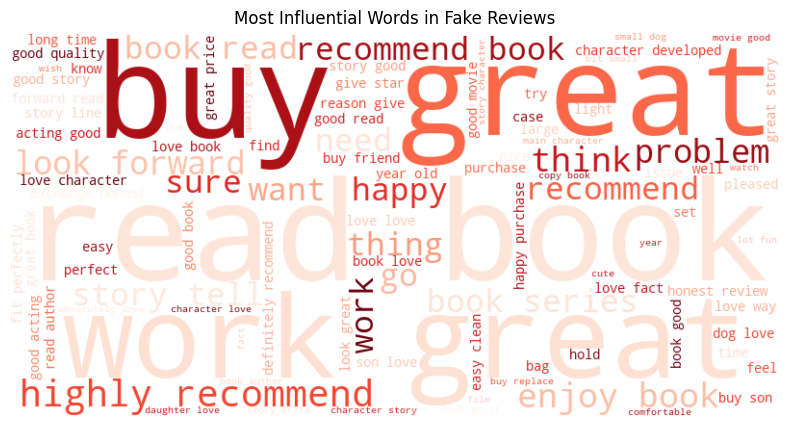


Top words analysis completed.
Interpretation: Common words in fake reviews often include generic positive terms
(e.g., 'great', 'love', 'good', 'best') that lack specific detail about the product usage.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# 1. Load Data
dataset_path = 'fake_reviews_dataset.csv'
try:
    df = pd.read_csv(dataset_path)
except FileNotFoundError:
    print(f"Error: File {dataset_path} not found.")
    exit()

# 2. Filter for Fake Reviews ('CG' = Computer Generated / Fake)
print("Filtering for fake reviews (Label: CG)...")
fake_reviews = df[df['label'] == 'CG']

if fake_reviews.empty:
    print("No fake reviews found/loaded. Check dataset labels.")
else:
    # 3. Text Processing with Spacy
    print(f"Found {len(fake_reviews)} fake reviews.")
    
    print("Loading Spacy model...")
    try:
        import spacy
        nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    except OSError:
        print("Error: Spacy model 'en_core_web_sm' not found. Please run: python -m spacy download en_core_web_sm")
        exit()
        
    def spacy_clean(text):
        doc = nlp(str(text).lower())
        tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
        return " ".join(tokens)

    print("Processing text with Spacy (this might take a moment)...")
    # For efficiency on large dataset, we can use nlp.pipe if we wanted to be fancy, 
    # but apply is fine here.
    processed_text = fake_reviews['text_'].apply(spacy_clean)
    text_corpus = " ".join(processed_text)

    # 4. Generate Word Cloud
    print("Generating Word Cloud...")
    # Add some specific stopwords if necessary
    stopwords = set(STOPWORDS)
    stopwords.update(["product", "one", "br", "will", "use"])

    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100,
                          colormap='Reds').generate(text_corpus)

    # 5. Save and Show
    output_file = 'fake_reviews_wordcloud.png'
    wordcloud.to_file(output_file)
    print(f"Word Cloud saved to {output_file}")

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Most Influential Words in Fake Reviews")
    plt.show()

    # 6. Interpretation Helper
    print("\nTop words analysis completed.")
    print("Interpretation: Common words in fake reviews often include generic positive terms")
    print("(e.g., 'great', 'love', 'good', 'best') that lack specific detail about the product usage.")
